In [1]:
import principal_portfolios as pp
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import glob
import os
import utils


data_to_read_address = "data/ETF/BLOOMBERG_weekly"
csv_files = glob.glob(os.path.join(data_to_read_address, "*.csv"))

categories_data = pd.read_csv("data/ETF/ETF_List.csv")


In [ ]:
# these three lines filter ETFs
filtered_etf_list = categories_data[(categories_data['Broad_Index'] == 'Y')]['Ticker'].to_list()
filtered_etf_list = [s + "_monthly_return" for s in filtered_etf_list]
filtered_etf_list.insert(0,'date')

### Reading and merging the data

In [3]:
dataframes = []

# Read each CSV file and store it in the list
for file in csv_files:
    df = pd.read_csv(file)
    df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' column is datetime
    dataframes.append(df)

# Perform an inner merge on the 'date' column across all DataFrames
merged_df = dataframes[0]
for df in dataframes[1:]:
    merged_df = pd.merge(merged_df, df, on='date', how='inner')

merged_df.head(5)

,date,069500 KS Equity_monthly_return,069660 KS Equity_monthly_return,1305 JP Equity_monthly_return,1306 JP Equity_monthly_return,1308 JP Equity_monthly_return,1311 JP Equity_monthly_return,1319 JP Equity_monthly_return,1320 JP Equity_monthly_return,1321 JP Equity_monthly_return,...,XLK US Equity_monthly_return,XLP US Equity_monthly_return,XLU US Equity_monthly_return,XLV US Equity_monthly_return,XLY US Equity_monthly_return,XMD CN Equity_monthly_return,XNTK US Equity_monthly_return,XRE CN Equity_monthly_return,XSB CN Equity_monthly_return,XSP CN Equity_monthly_return
0,2002-10-31,6.5807,7.5324,-6.6666,-5.5434,-6.9817,-3.0351,-6.1798,-7.6098,-7.6097,...,24.7675,3.8909,-2.3030,5.8313,6.7491,-0.7299,23.1740,1.5544,0.1752,6.9229
1,2002-11-30,11.3801,10.8696,3.8017,3.5674,3.4643,3.2863,4.7904,6.7285,6.7285,...,15.8538,-2.7723,2.9056,3.0899,4.6281,3.9216,17.7232,-2.0408,0.0001,6.1872
2,2002-12-31,-11.5218,-11.6556,-5.7714,-5.9999,-5.6920,-7.4243,-6.2857,-6.7392,-7.3914,...,-13.2206,0.2746,3.2295,-3.7619,-8.5242,1.6698,-17.0528,1.9001,1.8088,-4.8103
3,2003-01-31,-6.7566,-5.9187,-2.4735,-2.1278,-2.4853,-4.0916,-3.6585,-2.5644,-1.8781,...,-2.3648,-3.4103,-2.3500,-0.3388,-3.3318,-0.5813,0.1044,1.5623,-1.0602,-5.3380
4,2003-02-28,-1.9765,-2.8834,-0.2417,-0.6042,-0.1213,-2.5598,-0.6329,0.5981,0.3588,...,0.4844,-3.0634,-5.3474,-2.2295,-0.4476,-2.1054,-0.1046,1.0256,0.7146,-4.8871


In [4]:
merged_df = merged_df[filtered_etf_list]
merged_df

,date,SPY US Equity_monthly_return,1319 JP Equity_monthly_return,EWA US Equity_monthly_return,EWC US Equity_monthly_return,EWD US Equity_monthly_return,EWG US Equity_monthly_return,EWH US Equity_monthly_return,EWI US Equity_monthly_return,EWJ US Equity_monthly_return,...,H25ETF FH Equity_monthly_return,IUSA LN Equity_monthly_return,1311 JP Equity_monthly_return,STTF SP Equity_monthly_return,NAFTRAC MM Equity_monthly_return,BEL BB Equity_monthly_return,069500 KS Equity_monthly_return,069660 KS Equity_monthly_return,FEZ US Equity_monthly_return,SPEU US Equity_monthly_return
0,2002-10-31,8.2285,-6.1798,6.1341,5.8138,14.7205,13.7555,6.7322,6.1643,-5.7298,...,10.9121,10.4855,-3.0351,6.1466,3.4482,1.1281,6.5807,7.5324,-1.4000,-3.7278
1,2002-11-30,6.1681,4.7904,5.0162,5.8241,18.6638,6.3339,5.2565,10.0361,3.6179,...,11.8550,6.9639,3.2863,-2.7397,3.0000,5.1723,11.3801,10.8696,7.0183,6.1079
2,2002-12-31,-5.6638,-6.2857,-3.0152,-1.6836,-13.5875,-10.1140,-5.4734,-2.4354,-2.9328,...,-7.1376,-9.7201,-7.4243,-1.0563,-0.3238,-2.8931,-11.5218,-11.6556,-5.0039,-6.6967
3,2003-01-31,-2.4594,-3.6585,3.9649,4.2373,-0.7331,-0.2031,0.6731,0.2057,-2.5898,...,-5.6676,-5.6568,-4.0916,-1.0675,-2.9220,-7.0506,-6.7566,-5.9187,-2.9530,-4.6774
4,2003-02-28,-1.3479,-0.6329,-1.5891,1.6259,-0.3166,-7.2302,-1.8717,2.6659,1.0341,...,-4.1975,5.2434,-2.5598,-6.5468,-0.3346,-11.2713,-1.9765,-2.8834,-5.0577,-0.7613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2024-07-31,1.2111,1.4176,2.4150,4.9340,0.6212,1.6002,-0.3266,3.5983,4.0007,...,1.3374,-1.0325,-1.4499,3.7875,1.7897,6.3997,-0.6947,-0.9333,0.5597,2.4909
262,2024-08-31,2.3367,-0.2121,3.3972,4.0338,4.1237,4.8861,6.0985,4.6041,1.4092,...,2.9433,-0.8861,-4.1979,1.3264,-1.8367,0.7277,-4.7869,-4.8933,4.4124,3.7859
263,2024-09-30,2.1010,1.0424,4.7930,2.5436,2.9403,3.7081,15.3273,0.2833,-0.5974,...,1.2529,0.5479,-2.9569,4.3254,1.4835,2.8409,-4.3527,-3.9069,1.5166,0.4358
264,2024-10-31,-0.8924,13.6842,-6.4922,-2.1437,-8.0395,-4.4918,-4.2337,-2.4126,-4.8501,...,-5.0216,4.1024,3.1571,-0.7686,-3.4912,-2.1228,-1.4880,-1.9425,-5.6162,-5.6942


#### Deleting the columns that are more than 95 percent correlated.

In [5]:
merged_df = utils.exclude_redundant_columns_FX_portfolios_datasets(merged_df,corr=0.90)
merged_df

,date,SPY US Equity_monthly_return,1319 JP Equity_monthly_return,EWA US Equity_monthly_return,EWC US Equity_monthly_return,EWD US Equity_monthly_return,EWG US Equity_monthly_return,EWH US Equity_monthly_return,EWI US Equity_monthly_return,EWJ US Equity_monthly_return,...,DJGTEEX GR Equity_monthly_return,SFY AU Equity_monthly_return,1329 JP Equity_monthly_return,JPNCHA SW Equity_monthly_return,USACHA SW Equity_monthly_return,UST FP Equity_monthly_return,NBEES IN Equity_monthly_return,H25ETF FH Equity_monthly_return,IUSA LN Equity_monthly_return,BEL BB Equity_monthly_return
0,2002-10-31,8.2285,-6.1798,6.1341,5.8138,14.7205,13.7555,6.7322,6.1643,-5.7298,...,11.2298,0.2581,-11.3266,-6.1267,10.0219,21.8366,-1.0769,10.9121,10.4855,1.1281
1,2002-11-30,6.1681,4.7904,5.0162,5.8241,18.6638,6.3339,5.2565,10.0361,3.6179,...,3.3655,2.7669,-3.3373,3.9824,5.5447,17.5152,10.3681,11.8550,6.9639,5.1723
2,2002-12-31,-5.6638,-6.2857,-3.0152,-1.6836,-13.5875,-10.1140,-5.4734,-2.4354,-2.9328,...,-9.3024,-2.3167,-8.3333,-9.3615,-10.2749,-19.7574,4.3682,-7.1376,-9.7201,-2.8931
3,2003-01-31,-2.4594,-3.6585,3.9649,4.2373,-0.7331,-0.2031,0.6731,0.2057,-2.5898,...,-7.6923,-0.5545,12.9870,-5.2816,-9.2438,-3.2398,-4.8605,-5.6676,-5.6568,-7.0506
4,2003-02-28,-1.3479,-0.6329,-1.5891,1.6259,-0.3166,-7.2302,-1.8717,2.6659,1.0341,...,-1.1110,-4.4577,3.4483,-0.6196,-0.0003,2.2323,2.3888,-4.1975,5.2434,-11.2713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2024-07-31,1.2111,1.4176,2.4150,4.9340,0.6212,1.6002,-0.3266,3.5983,4.0007,...,-1.8618,3.9854,-0.9939,1.5369,-1.5632,-3.5122,3.8394,1.3374,-1.0325,6.3997
262,2024-08-31,2.3367,-0.2121,3.3972,4.0338,4.1237,4.8861,6.0985,4.6041,1.4092,...,-0.3572,0.6133,-1.2853,-1.9010,-2.0703,-1.9041,1.1989,2.9433,-0.8861,0.7277
263,2024-09-30,2.1010,1.0424,4.7930,2.5436,2.9403,3.7081,15.3273,0.2833,-0.5974,...,0.7542,3.0180,-1.2783,-1.3636,1.9453,2.3504,2.5970,1.2529,0.5479,2.8409
264,2024-10-31,-0.8924,13.6842,-6.4922,-2.1437,-8.0395,-4.4918,-4.2337,-2.4126,-4.8501,...,1.1043,-1.2967,3.3256,-2.4114,3.3340,2.4261,-6.1516,-5.0216,4.1024,-2.1228


In [ ]:
#merged_df.drop('XLF US Equity_monthly_return',axis=1)

,date,XLP US Equity_monthly_return,XLU US Equity_monthly_return,XLB US Equity_monthly_return,XLE US Equity_monthly_return,XLI US Equity_monthly_return,XLK US Equity_monthly_return,XLV US Equity_monthly_return,XLY US Equity_monthly_return,IYZ US Equity_monthly_return,...,SXFPEX GR Equity_monthly_return,SXIPEX GR Equity_monthly_return,SXMPEX GR Equity_monthly_return,SXNPEX GR Equity_monthly_return,SXOPEX GR Equity_monthly_return,SXPPEX GR Equity_monthly_return,SXQPEX GR Equity_monthly_return,SXRPEX GR Equity_monthly_return,SXTPEX GR Equity_monthly_return,XRE CN Equity_monthly_return
0,2002-10-31,3.8909,-2.3030,5.7096,1.8431,4.9183,24.7675,5.8313,6.7491,31.6240,...,9.5809,23.9131,14.0001,4.0000,3.5712,12.7776,-1.2658,14.9999,18.8888,1.5544
1,2002-11-30,-2.7723,2.9056,12.0318,4.1300,5.2247,15.8538,3.0899,4.6281,11.9588,...,6.0112,10.5263,12.2807,7.0515,11.0346,9.3594,-1.2822,-1.9325,8.4112,-2.0408
2,2002-12-31,0.2746,3.2295,-4.5920,0.0107,-3.9359,-13.2206,-3.7619,-8.5242,-7.6046,...,-5.1545,-15.2381,-14.2708,-12.5750,-9.9380,-8.4233,-2.1644,-10.3448,-12.9311,1.9001
3,2003-01-31,-3.4103,-2.3500,-4.9898,-2.5080,-5.3911,-2.3648,-0.3388,-3.3318,-4.7219,...,-9.2390,-11.9851,-5.8323,-5.4793,-5.5173,-8.5098,-7.9647,-3.8461,-6.9309,1.5623
4,2003-02-28,-3.0634,-5.3474,-2.6528,2.9398,-1.5398,0.4844,-2.2295,-0.4476,-6.6630,...,-4.1918,-4.9646,-10.3225,-9.4204,-1.4598,1.6129,-7.6922,-4.0000,-2.1277,1.0256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2024-07-31,1.6582,6.8242,4.3369,2.2601,4.9149,-3.2842,2.6622,2.7904,6.1694,...,2.6318,1.5069,-0.8992,2.5076,6.6103,-4.8994,-0.0635,2.5001,-1.3321,8.6198
262,2024-08-31,5.9858,4.8083,2.3226,-2.0705,2.8156,0.6993,5.0590,-0.1975,2.2116,...,2.5718,4.2070,0.1258,1.2160,0.9506,-2.8428,2.5045,5.2690,4.7156,6.3868
263,2024-09-30,1.1254,6.5965,2.6801,-3.0274,3.3595,2.6484,-1.6570,7.2991,7.6826,...,2.0009,2.6532,0.0627,1.4417,1.0761,8.3918,1.2706,5.1774,4.3213,6.4447
264,2024-10-31,-3.4697,-1.0770,-3.1023,0.8998,-1.1886,-1.5593,-4.6422,-1.7367,1.2666,...,-2.5200,-2.5765,0.0528,-1.9066,-2.9118,-6.1969,-7.3416,-5.9688,1.9401,-8.6187


## Principal Portfolio Analysis 

dict_keys(['ETF_monthly_data'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df'])
return_of_simple_factor          -0.483687
realized_return_of_first_n_PP     0.021950
realized_return_of_first_n_PEP    0.108082
realized_return_of_last_n_PEP     0.262704
long_short_realized_PEP          -0.080053
                                    ...   
realized_return_of_16_PAP         0.138393
realized_return_of_17_PAP        -0.383399
realized_return_of_18_PAP         0.060628
PEP and PAP 1-n                   0.036702
long-short PEP and PAP 1-n       -0.098864
Length: 100, dtype: float64


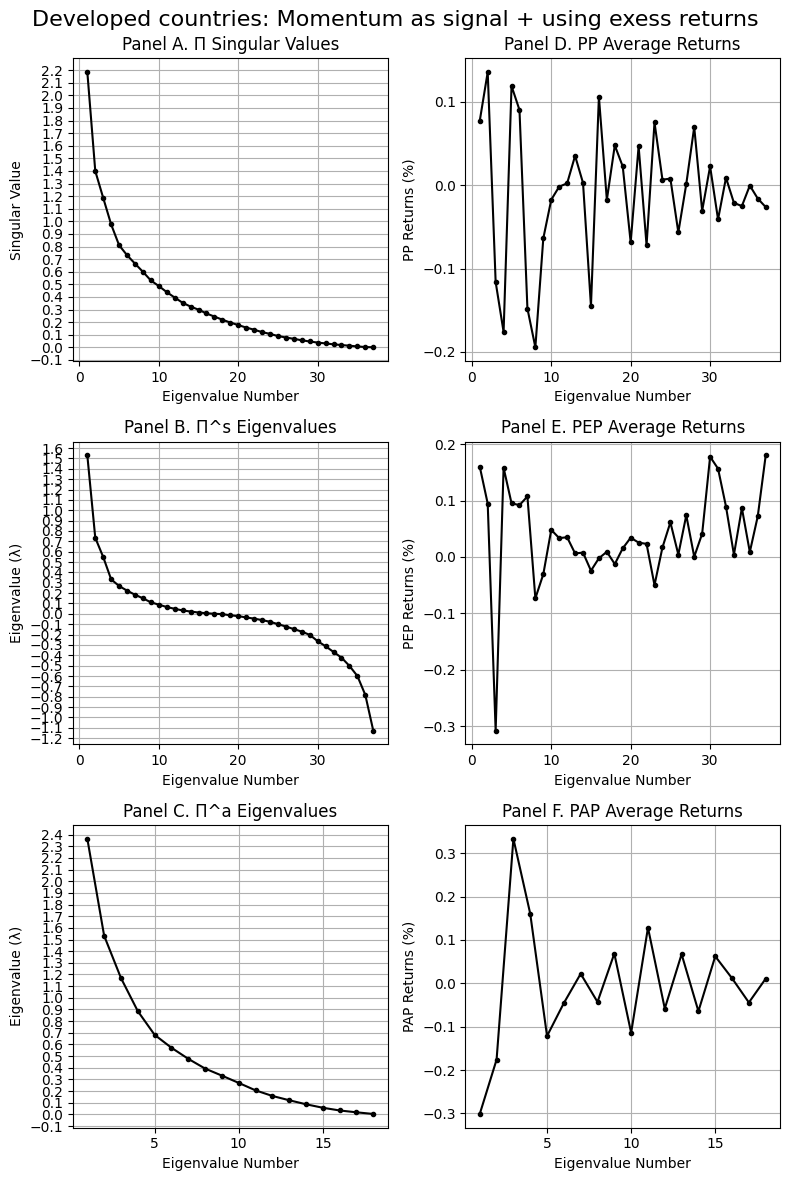

In [6]:
starting_year_to_filter = 1996
end_year_to_filter = 2024
number_of_lookback_periods = 120
number_of_PPs_to_consider = 5
number_of_PEPs_to_consider = 5
number_of_PAPs_to_consider = 5
output_dict_momentum = {}


signal_df = utils.build_signal_df_for_1month_momentum(merged_df)



portfolios_key = "ETF_monthly_data"
output_dict_momentum[portfolios_key] = pp.build_PP(merged_df,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=None, number_of_PPs_to_consider=number_of_PPs_to_consider,
                                                                   number_of_PEPs_to_consider=number_of_PEPs_to_consider, 
                                                                   number_of_PAPs_to_consider= number_of_PAPs_to_consider)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict_momentum.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict_momentum[portfolios_key].keys())
print(output_dict_momentum[portfolios_key]["sharpe_df"])

number_of_portfolios = merged_df.shape[1]
title = 'Developed countries: Momentum as signal + using exess returns'

pp.singular_values_vs_realized_returns_graph(output_dict_momentum, portfolios_key, number_of_portfolios, title)

In [7]:
output_dict_momentum[portfolios_key]["sharpe_df"].to_csv('test.csv')